# CNN 大課題

CNNとはどういったものでしょうか。一般的なディープラーニングとの比較もしながら説明してください。
>畳み込み層とプーリング層の繰り返し構造をもつディープラーニング。

>・畳み込む際にフィルタ（カーネル）を適用することで、例えば画像認識タスクでは元データを入力用に変換した素性
（以下、入力データ）をニューラルネットワークにフィードしても、元データの特徴量（特徴量マップ）がもつ位置情報（以下、空間情報）を
保持させたままフィードフォワードさせることができる。ニューラルネットワークの層を深くした一般的なディープラーニングの構造では、これらの空間情報は保持されない。

>・畳み込みと併せてプーリングすることで、パラメータ数を削減することができる。

CNNにおける畳み込み層とプーリング層について説明してください。パディングとストライドとは何かということも含めてください。
> （１）畳み込み層＝畳み込み演算を行う層。
畳み込み演算＝入力データに対して、フィルタを適用することで、出力サイズを制御する演算。
具体的には、フィルタのウィンドウを一定間隔でスライドさせながら適用していく。このスライドの間隔をストライドという。また、
出力サイズを制御するために、フィルタの適用に先立って入力データの周囲に固定データを埋め込むことがある。これをパディングという。
パディングを施す理由として、ディープなモデル構造における畳み込み演算の繰り返しにより、出力サイズが縮小され続け、ついに１に
なってしまい、それ以上の演算が不可能に陥る事態を回避することが挙げられる。

>（２）プーリング層＝縦・横の空間を小さくする演算を行う層。
演算方法は平均プーリングや最大プーリングがある。プーリング層は対象領域から純粋に最大値や平均値を抽出だけの処理なので、学習
するパラメータは存在せず、チャンネル数も変化しない点が畳み込み層とは異なる。
また、対象領域から最大値や平均値を抽出する処理は、入力データの空間情報の僅かな変化に対して、ロバストに演算結果を返してくれる。

CNNの精度を向上させたいときに行うことを説明してください。
> ### 1.モデルの構造をチューニングする

>* #### A.表現力の向上

    > （１）フィルタ数を増やす。
    
    > （２）層をディープにする。


>* #### B.過学習の抑制

    > （１）Weight decay：過学習は、重みパラメータが大きな値をとることに起因することが多い。これに対処するために、損失関数にL2ノルムを加算することで、重みの肥大化を抑制させる。
    
    >（２）Dropoutを導入する：これにより、少しずつ違うニューラルネットワークがたくさんあることになり、アンサンブル学習の効果をモデル内で擬似的に得られる。

>* #### C.勾配消失の回避

    > Batch Normalizationの導入：
    
    >ニューラルネットワークの学習とはつまり、推論結果という現在地から正解ラベルという目的地へ、勾配を手がかりに向かっていくということである。

> しかしモデルの表現力を求めて構造を複雑にするあまり、この勾配が消失してしまっては目的地への手がかりを失うことになる。

> 勾配消失の回避に重要視される点として重みの初期値を慎重に設定したり、学習が適切に収束するように学習率を下げたりすることが挙げられるが、デメリット（例えば学習時間が増大するなど）も存在する。

> Batch Normalizationで各層のデータ分布を正則化してやることで、初期値に対してロバストになり勾配消失を回避できるうえ、過学習の抑制や学習時間の短縮が期待できるなどのメリットを享受できる。


> ###  2.データセットをニューニングする
    >* Data Augmentarion
    >入力データを人工的に拡張させ、学習用データのリソースを充実させる。
    > 回転、（縦横方向への）移動、crop処理、flip処理など。

/Users/yuusuketabata/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


170500096/170498071 [==============================] - 92s 1us/step
x_train.shape :  (50000, 32, 32, 3)
y_train.shape :  (50000, 1)
x_test.shape :  (10000, 32, 32, 3)
y_test.shape :  (10000, 1)
y_test[0:10] :  [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


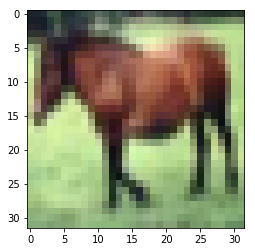

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.python.keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

#データの大きさを確認
print('x_train.shape : ',x_train.shape)
print('y_train.shape : ',y_train.shape)
print('x_test.shape : ',x_test.shape)
print('y_test.shape : ',y_test.shape)
print('y_test[0:10] : ',y_test[0:10])

#指定したラベルのインデックスを取得する
temp = np.where(y_train==7)[0][0]
plt.imshow(x_train[temp])

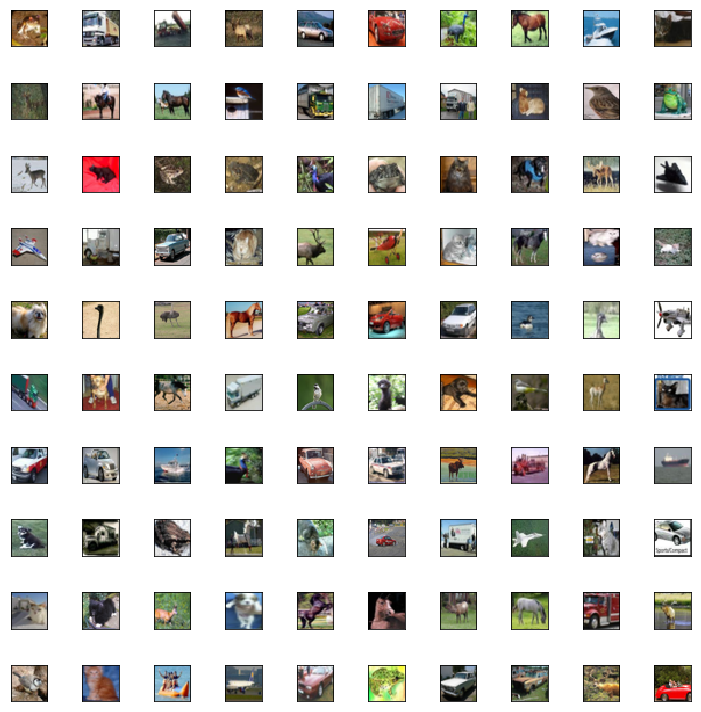

In [3]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((32, 32, 3)), cmap='gray')

In [35]:
#画像サイズを取得
img_rows = x_train[0].shape[1]
img_cols = x_train[0].shape[0]

#入力データの形状を取得
input_shape = x_train.shape[1:4]
print(input_shape)

#特徴量を正規化する
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#one-hot表現にする
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

(32, 32, 3)


In [36]:
#CNNのモデルを作成
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                       strides=(1,1),
                       padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                       strides=(1,1),
                       padding='valid'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=512,
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test,y_test,batch_size=None,verbose=1)
print("Test loss: ",score[0])
print("Test accuracy: ",score[1])
'''
Epoch 18/20
50000/50000 [==============================]
- 1112s 22ms/step - loss: 0.3353 - acc: 0.8843
- val_loss: 1.1419 - val_acc: 0.7214
'''

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1063s 21ms/step - loss: 1.6304 - acc: 0.4026 - val_loss: 1.2291 - val_acc: 0.5579
Epoch 2/20
50000/50000 [==============================] - 1105s 22ms/step - loss: 1.1983 - acc: 0.5693 - val_loss: 1.0334 - val_acc: 0.6218
Epoch 3/20
50000/50000 [==============================] - 1079s 22ms/step - loss: 1.0440 - acc: 0.6268 - val_loss: 0.9375 - val_acc: 0.6613
Epoch 4/20
50000/50000 [==============================] - 1090s 22ms/step - loss: 0.9402 - acc: 0.6676 - val_loss: 0.8911 - val_acc: 0.6890
Epoch 5/20
50000/50000 [==============================] - 1089s 22ms/step - loss: 0.8482 - acc: 0.6992 - val_loss: 0.8708 - val_acc: 0.6993
Epoch 6/20
50000/50000 [==============================] - 1088s 22ms/step - loss: 0.7618 - acc: 0.7311 - val_loss: 0.8579 - val_acc: 0.7107
Epoch 7/20
50000/50000 [==============================] - 1105s 22ms/step - loss: 0.6945 - acc: 0.7548 - val_l

KeyboardInterrupt: 

このようなモデルにした理由を説明してください。
> [ conv-conv-pool-dropout-conv-conv-pool-dropout-concat-dropouot-concat ]

> CPUによる学習なので層をあまり深くはせずに、dropoutによる擬似アンサンブル学習で表現力の向上を期待した。